## Q1. Delivery_time -> Predict delivery time using sorting time  

#### 1. Import necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 2. Importing Dataset

In [8]:
delivery_data=pd.read_csv('delivery_time.csv')
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### 3. EDA

In [9]:
delivery_data.shape

(21, 2)

In [10]:
delivery_data.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [11]:
delivery_data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

#### 4. Data Visualization

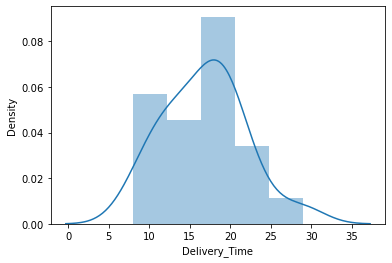

In [13]:
sns.distplot(delivery_data['Delivery_Time'])
plt.show()

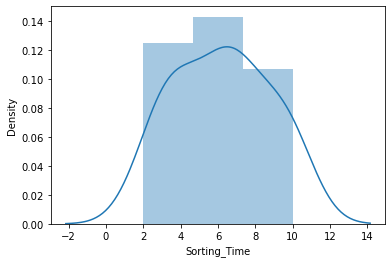

In [14]:
sns.distplot(delivery_data['Sorting_Time'])
plt.show()

#### 5. Correlation check

In [15]:
delivery_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


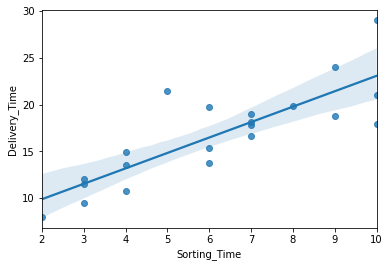

In [17]:
sns.regplot(x=delivery_data['Sorting_Time'],y=delivery_data['Delivery_Time'])
plt.show()

#### 6. Model Building

In [44]:
import statsmodels.formula.api as smf
del_model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_data).fit()

#### 7. Model Testing

In [45]:
del_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [46]:
del_model.tvalues, del_model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [47]:
del_model.rsquared , del_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### 8. Model Prediction

In [48]:
# Manual prediction for sorting time (x=3)
delivery_time = ((1.649020)*3) + (6.582734)  #y=mx+c
delivery_time

11.529793999999999

In [49]:
# System prediction for 2 values
new_pred = pd.Series([3,5])
new_pred

0    3
1    5
dtype: int64

In [50]:
predicted_data = pd.DataFrame(new_pred,columns=['Sorting_Time'])
predicted_data

,Sorting_Time
0,3
1,5


In [51]:
del_model.predict(predicted_data)

0    11.529794
1    14.827833
dtype: float64

## Q2. Salary_hike -> Build a prediction model for Salary_hike

#### 2. Importing Dataset

In [52]:
sal_data = pd.read_csv('Salary_Data.csv')
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### 3. EDA

In [53]:
sal_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [54]:
sal_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [55]:
sal_data.shape

(30, 2)

#### 4. Data Visualization

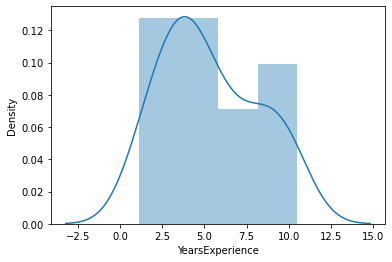

In [56]:
sns.distplot(sal_data['YearsExperience'])
plt.show()

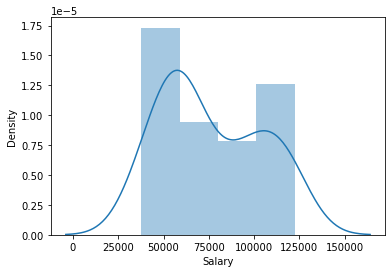

In [57]:
sns.distplot(sal_data['Salary'])
plt.show()

#### 5.Correlation check

In [58]:
sal_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


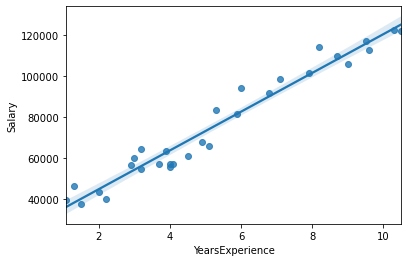

In [59]:
sns.regplot(x=sal_data['YearsExperience'],y=sal_data['Salary'])
plt.show()

#### 6. Model Building

In [60]:
sal_model = smf.ols("Salary~YearsExperience",data=sal_data).fit()

#### 7. Model Testing

In [62]:
sal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
sal_model.tvalues,sal_model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [64]:
sal_model.rsquared,sal_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#### 8. Model Prediction

In [66]:
#Manual prediction for say 5 years of experience
salary = (25792.200199) + (9449.962321)*(3)  #y=mx+c
salary

54142.087162

In [67]:
#System prediction for 5 and 7 years
new_pred=pd.Series([5,7])
new_pred

0    5
1    7
dtype: int64

In [68]:
predicted_data = pd.DataFrame(new_pred,columns=['YearsExperience'])
predicted_data

,YearsExperience
0,5
1,7


In [69]:
sal_model.predict(predicted_data)

0    73042.011806
1    91941.936449
dtype: float64